In [22]:
!pip install pyod

  Using cached pyod-1.1.3.tar.gz (160 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached joblib-1.4.0-py3-none-any.whl.metadata (5.4 kB)
  Using cached numba-0.59.1-cp311-cp311-win_amd64.whl.metadata (2.8 kB)
  Using cached scipy-1.13.0-cp311-cp311-win_amd64.whl.metadata (60 kB)
  Using cached scikit_learn-1.4.2-cp311-cp311-win_amd64.whl.metadata (11 kB)
  Using cached llvmlite-0.42.0-cp311-cp311-win_amd64.whl.metadata (4.9 kB)
  Using cached threadpoolctl-3.4.0-py3-none-any.whl.metadata (13 kB)
Using cached numba-0.59.1-cp311-cp311-win_amd64.whl (2.6 MB)
Using cached scikit_learn-1.4.2-cp311-cp311-win_amd64.whl (10.6 MB)
Using cached joblib-1.4.0-py3-none-any.whl (301 kB)
Using cached scipy-1.13.0-cp311-cp311-win_amd64.whl (46.2 MB)
   ---------------------------------------- 0.0/28.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/28.1 MB ? eta -:--:--
   ---------------------------------------- 0.

In [33]:
!pip install statsmodels

   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/9.9 MB 1.1 MB/s eta 0:00:10
   - -------------------------------------- 0.3/9.9 MB 2.1 MB/s eta 0:00:05
   -- ------------------------------------- 0.6/9.9 MB 2.7 MB/s eta 0:00:04
   --- ------------------------------------ 0.8/9.9 MB 3.3 MB/s eta 0:00:03
   ---- ----------------------------------- 1.1/9.9 MB 3.8 MB/s eta 0:00:03
   ----- ---------------------------------- 1.4/9.9 MB 4.0 MB/s eta 0:00:03
   ------ --------------------------------- 1.7/9.9 MB 4.3 MB/s eta 0:00:02
   ------- -------------------------------- 1.8/9.9 MB 4.3 MB/s eta 0:00:02
   -------- ------------------------------- 2.2/9.9 MB 4.5 MB/s eta 0:00:02
   --------- ------------------------------ 2.4/9.9 MB 4.6 MB/s eta 0:00:02
   ---------- ----------------------------- 2.5/9.9 MB 4.4 MB/s eta 0:00:02
   ---------- ------------

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pyod.models.mad import MAD
from pyod.models.iforest import IForest
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
apple=pd.read_csv("apple_google.csv")

In [3]:
apple.head()

,Date,AAPL,GOOG
0,2010-01-04,NaN,313.06
1,2010-01-05,NaN,311.68
2,2010-01-06,NaN,303.83
3,2010-01-07,NaN,296.75
4,2010-01-08,NaN,300.71


In [4]:
# Convert the Date column to DateTime
apple['Date'] = pd.to_datetime(apple['Date'])

# Create a column for the day of the week
apple['day_of_week'] = apple['Date'].dt.day_of_week

# Create a column for the month
apple['month'] = apple['Date'].dt.month

# Create a column for the day of the month
apple['day_of_month'] = apple['Date'].dt.day

print(apple[['day_of_week', 'month', 'day_of_month']])

      day_of_week  month  day_of_month
0               0      1             4
1               1      1             5
2               2      1             6
3               3      1             7
4               4      1             8
...           ...    ...           ...
1859            2      5            24
1860            3      5            25
1861            4      5            26
1862            1      5            30
1863            2      5            31

[1864 rows x 3 columns]


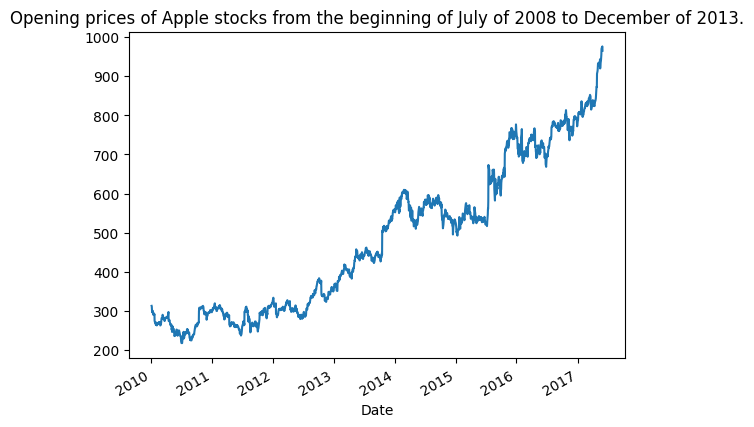

In [5]:
# Set the Date column as a DatetimeIndex
apple.set_index("Date",inplace=True)

# Plot the opening prices for the instructed range
apple["GOOG"].plot()

plt.title("Opening prices of Apple stocks from the beginning of July of 2008 to December of 2013.")
plt.show()

# MAD on time series
Initially, you can approach time series anomaly detection just like a regular dataset. For example, you can take a univariate approach and fit MAD to one of the time series columns.

pandas and the MAD estimator are already loaded for you.

In [6]:
# Load the Apple stocks dataset with a proper DatatimeIndex
apple = pd.read_csv("apple_google.csv", parse_dates=["Date"], index_col="Date")

# Fit MAD to the Volume column
mad = MAD().fit(apple[['GOOG']])

# Isolate the outliers
is_outlier = mad.labels_==1
outliers = apple[is_outlier]

print(len(outliers))

0


In [7]:
# Create three new features from the DatetimeIndex
apple['day_of_week'] = apple.index.day_of_week
apple['month'] = apple.index.month
apple['day_of_month'] = apple.index.day

# Isolation Forest on time series
If you want to use all the information available, you can fit a multivariate outlier detector to the entire dataset. The multivariate approach also enables you to extract more features from time series to enhance model performance.

Practice creating new features from a DatetimeIndex and fitting an outlier detector on them using the apple dataset, which has already been loaded with a DatetimeIndex.

Also, recall the random_state parameter, which can be used to generate reproducible results.

In [8]:
apple=apple.iloc[:,1:]

In [9]:
apple['day_of_week'] = apple.index.day_of_week
apple['month'] = apple.index.month
apple['day_of_month'] = apple.index.day

# Create and fit an IForest
iforest = IForest(random_state=1).fit(apple)

# Generate outlier probabilities
probs = iforest.predict_proba(apple)

# Generate outlier probabilities
probs = iforest.predict_proba(apple)

# Isolate the outliers
is_outlier = probs[:,1] > 0.7  # 70% threshold
outliers = apple[is_outlier]

print(len(outliers))

88


C:\Users\kevin\anaconda3\envs\CursomachineLearning\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(
C:\Users\kevin\anaconda3\envs\CursomachineLearning\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(


# Practicing decomposition
Decomposition will be an essential part of your toolbox when working with time series.

In this exercise, you will practice seasonal decomposition. The apple stocks dataset has already been loaded for you, along with matplotlib as plt.

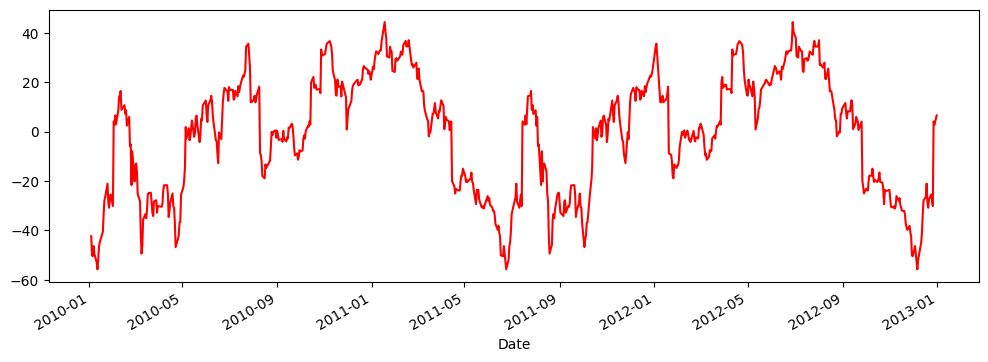

In [10]:
# Create a DecomposeResult object and plot seasonality
results = seasonal_decompose(apple["2010":"2012"]["GOOG"], period=365)
results.seasonal.plot(color="red", figsize=(12,4))

plt.show()

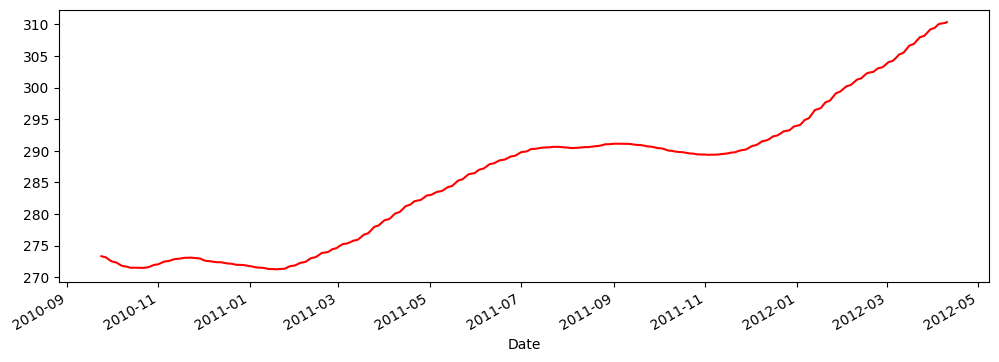

In [11]:
results.trend.plot(color="red", figsize=(12, 4))
plt.show()

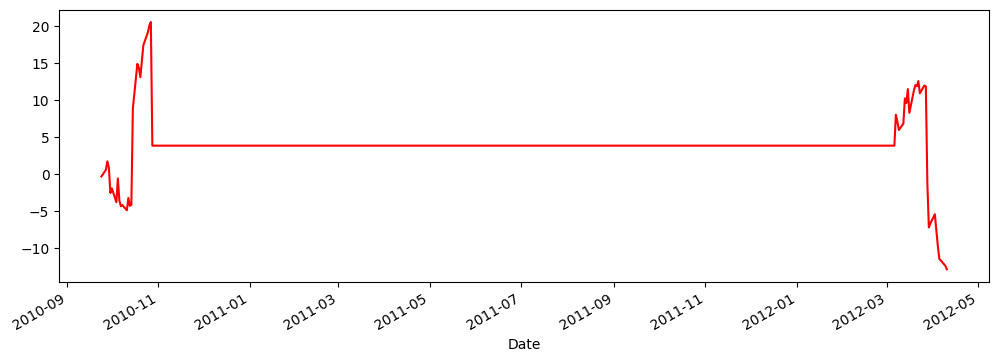

In [12]:
results.resid.plot(color="red", figsize=(12, 4))

plt.show()

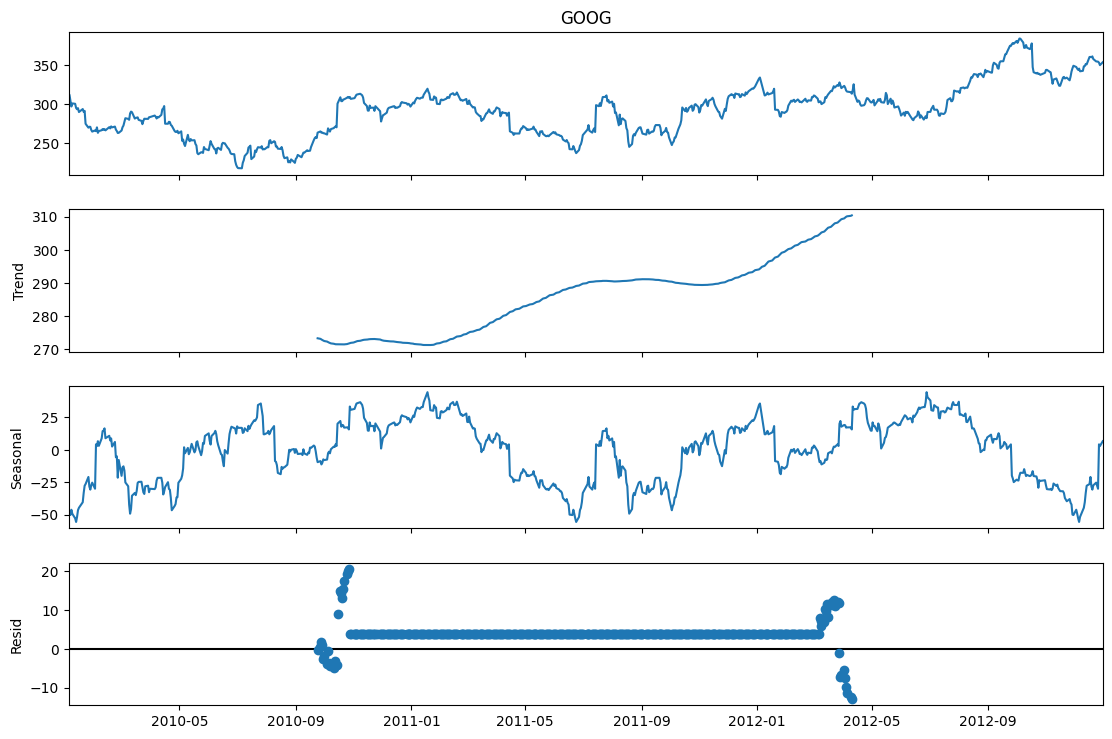

In [13]:
# Plot all three components
fig = results.plot()

fig.set_figwidth(12)
fig.set_figheight(8)
plt.show()

## Fitting on residuals
Another method of detecting outliers from time series is fitting a classifier to the residuals from decomposition. This is also a univariate approach with the advantage of being much faster than other multivariate methods.

The apple dataset has been loaded, along with MAD estimator and the seasonal_decompose function.

In [15]:
results = seasonal_decompose(apple['GOOG'], period=365)

residuals = results.resid
residuals = residuals.values.reshape(-1, 1)

mad = MAD().fit(residuals)

# Find the outliers
is_outlier = mad.labels_==1
outliers = apple[is_outlier]

print(len(outliers))

0


# Scaling parts of a dataset
In previous videos, you've used the QuantileTransformer on the full dataset. In this exercise, you will practice scaling only parts of a dataset. The reason for doing this is that the stocks datasets have numerically-encoded categorical features (day_of_week, day, month) that would have been incorrectly scaled if you used QuantileTransformer on the full dataset.

In [ ]:
# Create a list of columns
to_scale = ["Open","High","Low","Close","Volume"]

# Initialize a QuantileTransformer
qt = QuantileTransformer(output_distribution="normal")

# Scale and store simultaneously
apple.loc[:,to_scale] = qt.fit_transform(apple[to_scale])

# Manual outlier ensembles - creating the arrays
An ensemble is a collection of one or more machine learning models combined to make their predictions more robust. Creating outlier ensembles manually usually takes practice. Therefore, you will perform the operation in three steps.

In this exercise, you will create a list of estimators and an empty array to store the probability scores.

IForest is available to you, as well as NumPy as np.

In [ ]:
estimators = [IForest(n_estimators=50), IForest(n_estimators=100)]

shape = (len(apple), len(estimators))
probability_scores = np.empty(shape=shape)

for index, est in enumerate(estimators):
    est.fit(apple)
    
    probs = est.predict_proba(apple)
    
    # Store into probability_scores
    probability_scores[:, index] = probs[:,1]

# Aggregating and thresholding the probabilities
There are many aggregation methods available when using ensembles. The most popular ones are the arithmetic mean and median.

You can use the mean almost always, while you can reserve the median for cases when you have at least three or more classifiers in your estimators.

Use the arithmetic averaging to filter the outliers from the apple dataset. probability_scores, and apple is available from the previous exercise. NumPy is also loaded.

In [ ]:
# Find the mean across rows
mean_probs = np.mean(probability_scores,axis=1)

# Create a boolean mask that uses a 75% threshold
is_outlier = mean_probs>0.75

# Use the mask to filter outliers from apple
outliers = apple[is_outlier]

print(len(outliers))

# Non-aggressive methods of dealing with outliers
Trimming a distribution is one of the easiest ways of dealing with an outlier without dropping it. If you know the natural range of values a distribution must take related to your business problem, you can use that knowledge to trim the distribution.

Or, if you have some previous knowledge about which specific values are considered outliers based on domain knowledge or experience, you can also replace them with hard-coded values.

This exercise is a chance to practice these two techniques on the apple stocks dataset.

In [ ]:
percentile_first = apple['Volume'].quantile(0.01)
percentile_99th = apple['Volume'].quantile(0.99)

apple['Volume'] = apple['Volume'].clip(percentile_first, percentile_99th)

# Replace 0s with 100s
apple.replace(0, 100, inplace=True)

print(apple.head())